<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/examples/plot_coloc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eaxample notebook for plotting data
- created 1/24/2023 GT

### Installing some custom code

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git

Cloning into 'sleep'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 273 (delta 15), reused 20 (delta 8), pack-reused 242
Receiving objects: 100% (273/273), 1.08 MiB | 13.52 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
%cd sleep
!pip install .

/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.1-py3-none-any.whl size=997 sha256=4e171bcd2516dbddc71af30299f966ca8188de602996461b009309686ea38ca0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lwbd4eiw/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


### Importing packaged we work with

In [39]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('talk')

from sleep.base import core

## Mounting google drive

In [ ]:
drive = core.GoogleDrive()
dr = drive.mount_drive()

## Setting up input output folders

In [40]:
fig_folder = Path('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/figures')

## Loading cleaned data

In [11]:
data = drive.load_spreadsheet_data('PVN_quant', 'clean')
print(data)
data.info()

  mouse_id slide_id slice_id  CRH   2A Colocalization
1     TBD1     tbd1        1  104   71             26
2     TBD2     tbd2        2  353  186             80
3     TBD3     tbd3        3  176  117             50
4     TBD4     tbd4        4   92   74             37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mouse_id        4 non-null      object
 1   slide_id        4 non-null      object
 2   slice_id        4 non-null      object
 3   CRH             4 non-null      object
 4   2A              4 non-null      object
 5   Colocalization  4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


### changing proper datatypes

In [13]:
data[['CRH',
      '2A',
      'Colocalization']] = data[['CRH',
                                 '2A',
                                 'Colocalization']].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mouse_id        4 non-null      object
 1   slide_id        4 non-null      object
 2   slice_id        4 non-null      object
 3   CRH             4 non-null      int64 
 4   2A              4 non-null      int64 
 5   Colocalization  4 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 324.0+ bytes


### Adding a unique id

In [44]:
data['unique_id'] = data['mouse_id'] + data['slide_id'] + data['slice_id']

In [45]:
# adding coloc columns
data['CRH coloc'] = data['Colocalization']/data['CRH']*100
data['2A coloc'] = data['Colocalization']/data['2A']*100
# rounding to 2 decimals
data[['CRH coloc', '2A coloc']] = data[['CRH coloc', '2A coloc']].round(2)
data

,mouse_id,slide_id,slice_id,CRH,2A,Colocalization,CRH coloc,2A coloc,unique_id
1,TBD1,tbd1,1,104,71,26,25.00,36.62,TBD1tbd11
2,TBD2,tbd2,2,353,186,80,22.66,43.01,TBD2tbd22
3,TBD3,tbd3,3,176,117,50,28.41,42.74,TBD3tbd33
4,TBD4,tbd4,4,92,74,37,40.22,50.00,TBD4tbd44


In [42]:
cells = pd.melt(data[['CRH', '2A']], value_name='cell number',
                var_name='cell type')
cells

,cell type,cell number
0,CRH,104
1,CRH,353
2,CRH,176
3,CRH,92
4,2A,71
5,2A,186
6,2A,117
7,2A,74


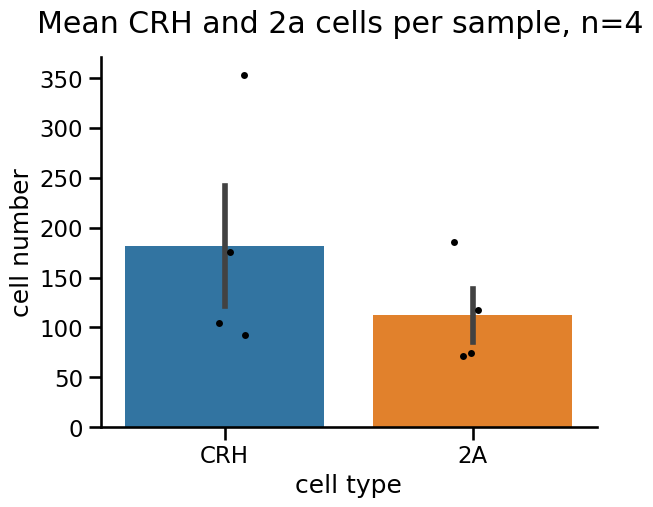

In [51]:
sns.barplot(cells, y='cell number', x='cell type', errorbar='se')
sns.stripplot(cells, y='cell number', x='cell type', color='k')
sns.despine()
plt.suptitle(f'Mean CRH and 2a cells per sample, n={data["unique_id"].nunique()}')
plt.savefig(fig_folder.joinpath('cell_number.png'),
            dpi=300, bbox_inches='tight')

In [37]:
colocs = pd.melt(data[['CRH coloc', '2A coloc']], value_name='coloc %',
                var_name='cell type')
colocs

,cell type,coloc %
0,CRH coloc,25.00
1,CRH coloc,22.66
2,CRH coloc,28.41
3,CRH coloc,40.22
4,2A coloc,36.62
5,2A coloc,43.01
6,2A coloc,42.74
7,2A coloc,50.00


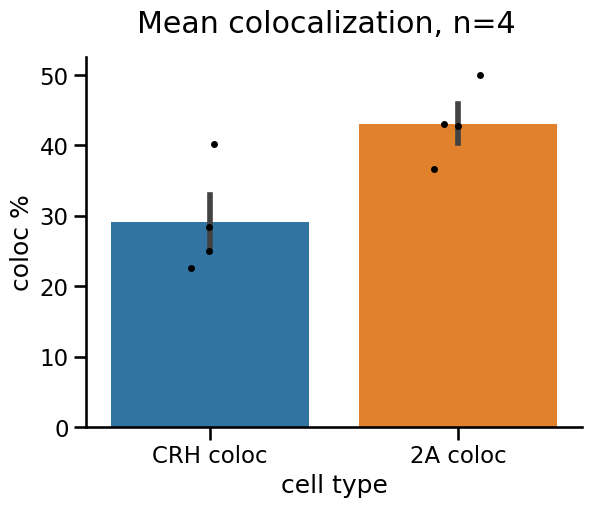

In [53]:
sns.barplot(colocs, y='coloc %', x='cell type', errorbar='se')
sns.stripplot(colocs, y='coloc %', x='cell type', color='k')
sns.despine()
plt.suptitle(f'Mean colocalization, n={data["unique_id"].nunique()}')
plt.savefig(fig_folder.joinpath('coloc_plot.png'),
            dpi=300, bbox_inches='tight')